<a href="https://colab.research.google.com/github/UnplugCharger/WEEK_4_Independent_Project/blob/master/Week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOCUMENTATION

##**Defining the question**



The average number of blue cars taken on weekdays believed to be 116 .The CEO at autolib is furious and claims that the average should be better than that and is demanding that the company but more cars.

H0  =  Average number is less than or equal to 116

H1  =  average number is greater than 116 (Claim)

##**Metrics of success**



Perform T statistics to  either reject or accept the null hypothesis



##**Context**




##**Experimental design**



We will perform a right tail test on a sample of the blue car population to verify the claim by the Autolib CEO.



##**Data relevance**

Our Data is relevant as it was obtained from Utilib company's server. With permission 

# IMPORTING MY LIBRARIES 

All libraries that will be used for this project will be imported in this section

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING OUR DATA

In [2]:
autolib=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [3]:
autolib_explanations=pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

In [4]:
autolib_explanations

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


#

In [5]:
autolib.head().T

,0,1,2,3,4
Postal code,75001,75001,75001,75001,75001
date,1/1/2018,1/2/2018,1/3/2018,1/4/2018,1/5/2018
n_daily_data_points,1440,1438,1439,1320,1440
dayOfWeek,0,1,2,3,4
day_type,weekday,weekday,weekday,weekday,weekday
BlueCars_taken_sum,110,98,138,104,114
BlueCars_returned_sum,103,94,139,104,117
Utilib_taken_sum,3,1,0,2,3
Utilib_returned_sum,2,1,0,2,3
Utilib_14_taken_sum,10,8,2,9,6


**Cheking for null values ,datatypes,missing values,duplicated values**

In [6]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[122]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['percent duplicated'] = df.duplicated().sum()*100/len(df)
        return info.sort_values('data type')

In [7]:
sniff(autolib)

,sample,data type,percent missing,percent duplicated
Postal code,75001,int64,0.0,0.0
n_daily_data_points,1439,int64,0.0,0.0
dayOfWeek,6,int64,0.0,0.0
BlueCars_taken_sum,152,int64,0.0,0.0
BlueCars_returned_sum,155,int64,0.0,0.0
Utilib_taken_sum,2,int64,0.0,0.0
Utilib_returned_sum,2,int64,0.0,0.0
Utilib_14_taken_sum,12,int64,0.0,0.0
Utilib_14_returned_sum,12,int64,0.0,0.0
Slots_freed_sum,17,int64,0.0,0.0


**Getting the basic stats for our numerical variables**

In [8]:
autolib.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
dayOfWeek,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0


In [9]:
autolib[autolib['BlueCars_returned_sum']<2].shape

(150, 13)

## Z score checking for the outliers

In [10]:

outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [11]:
outlier_pt=detect_outliers(autolib['BlueCars_returned_sum'])
len(outlier_pt)

460

In [12]:
outlier_pt=detect_outliers(autolib['BlueCars_taken_sum'])
len(outlier_pt)

928

From the above we find that alot of values lie outside 3 standard deviations and  normally they are treated like outliers 

# Cleaning the Data

Selecting only those columns we will need 

In [13]:
clean_set = autolib[['BlueCars_returned_sum','BlueCars_taken_sum','day_type','dayOfWeek']]

removing the weekends only to remain with the week days

In [14]:
clean_set.head(10)

,BlueCars_returned_sum,BlueCars_taken_sum,day_type,dayOfWeek
0,103,110,weekday,0
1,94,98,weekday,1
2,139,138,weekday,2
3,104,104,weekday,3
4,117,114,weekday,4
5,185,187,weekend,5
6,180,180,weekend,6
7,83,84,weekday,0
8,84,81,weekday,1
9,85,88,weekday,2


In [15]:
clean_set1=clean_set[clean_set['day_type'].str.contains('weekday')]

In [16]:
clean_set1.shape

(11544, 4)

In [17]:
clean_set.shape

(16085, 4)

# BIVARIATE PLOTTING

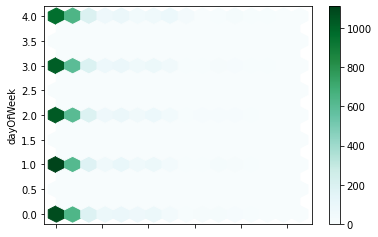

In [18]:
clean_set1[clean_set1['BlueCars_returned_sum']>0].plot.hexbin(x='BlueCars_returned_sum',y='dayOfWeek',gridsize=15)
plt.show()

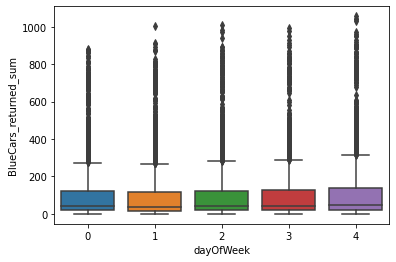

In [19]:
sns.boxplot(x='dayOfWeek',y='BlueCars_returned_sum',data=clean_set1)
plt.show()

In [20]:
clean_set1['log_BlueCars_returned_sum']= np.log(clean_set1.BlueCars_returned_sum+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
clean_set1['log_BlueCars_taken_sum']=np.log(clean_set1.BlueCars_taken_sum+1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


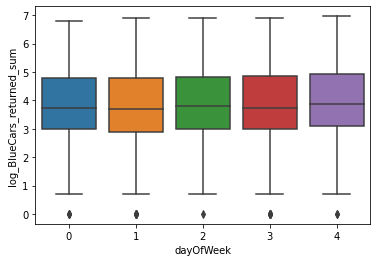

In [22]:
sns.boxplot(x='dayOfWeek',y='log_BlueCars_returned_sum',data=clean_set1)
plt.show()

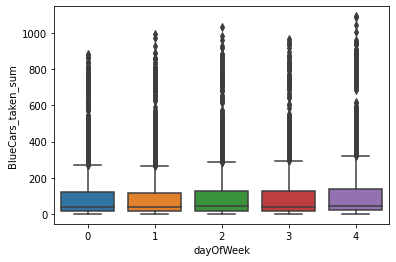

In [23]:
sns.boxplot(x='dayOfWeek',y='BlueCars_taken_sum',data=clean_set1)
plt.show()

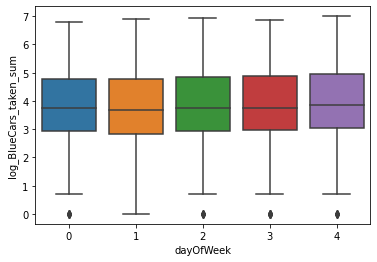

In [24]:
sns.boxplot(x='dayOfWeek',y='log_BlueCars_taken_sum',data=clean_set1)
plt.show()

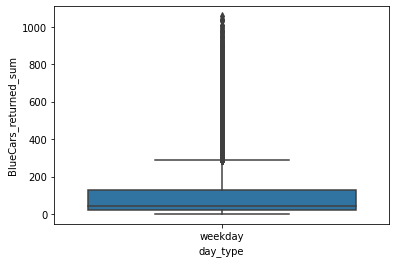

In [25]:
sns.boxplot(x='day_type',y='BlueCars_returned_sum',data=clean_set1)
plt.show()

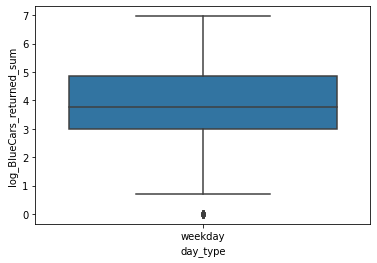

In [26]:
sns.boxplot(x='day_type',y='log_BlueCars_returned_sum',data=clean_set1)
plt.show()

<Figure size 1152x864 with 0 Axes>

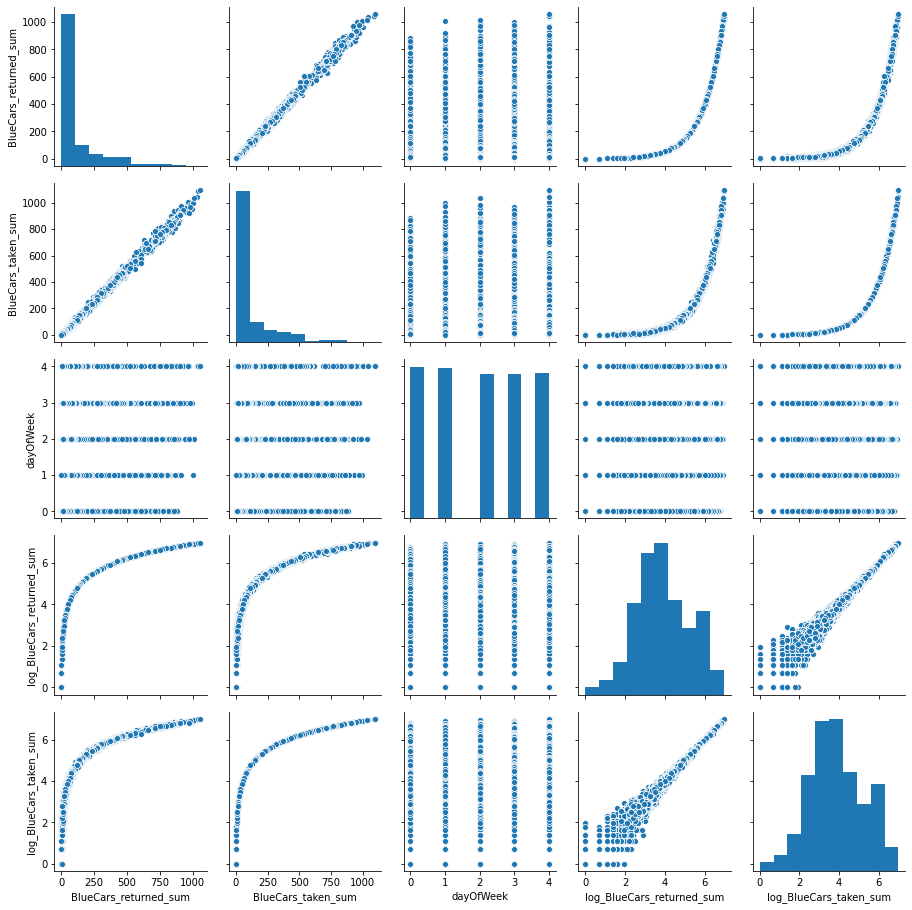

<Figure size 1152x864 with 0 Axes>

In [27]:
sns.pairplot(clean_set1)
plt.figure(figsize=(16,12))

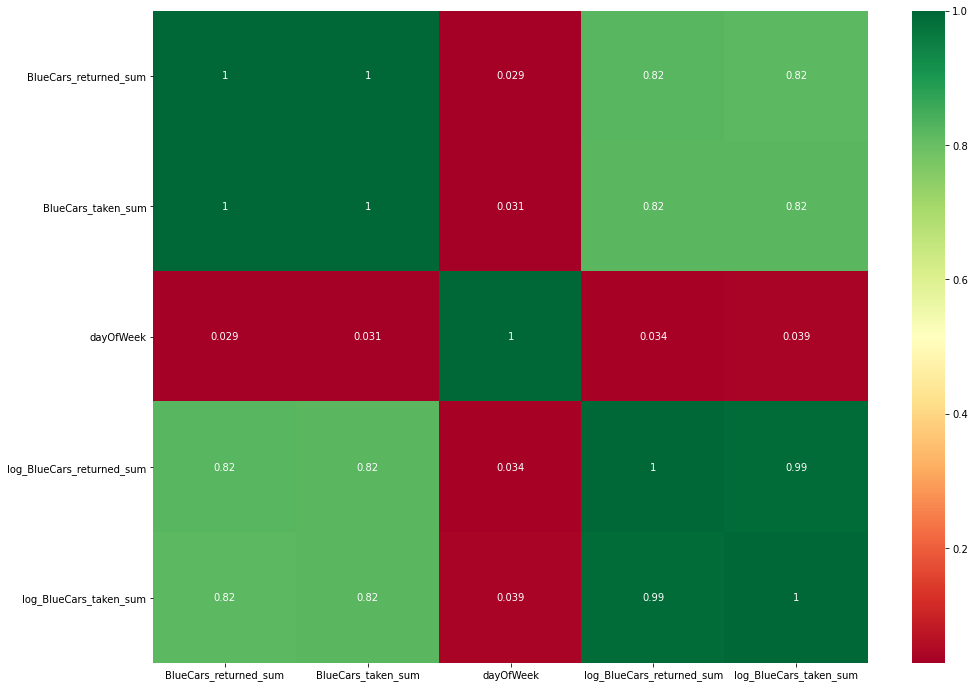

In [28]:
corrmat=clean_set1.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(16,12))
#plot heat map 
g=sns.heatmap(clean_set1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# EDA

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(clean_set1)
prof

In [ ]:
!pip install pandas-profiling -U


# SAMPLING

We will use stratified sampling in this scenario

our strata will be day_of_the week to campture the trends over the week

In [33]:
strat_output= clean_set1.groupby(['dayOfWeek'],group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))

In [34]:
strat_output.head()

,BlueCars_returned_sum,BlueCars_taken_sum,day_type,dayOfWeek,log_BlueCars_returned_sum,log_BlueCars_taken_sum
7389,153,157,weekday,0,5.036953,5.062595
8563,24,15,weekday,0,3.218876,2.772589
12892,13,20,weekday,0,2.639057,3.044522
3325,12,9,weekday,0,2.564949,2.302585
13411,43,44,weekday,0,3.784190,3.806662


In [35]:
strat_output.describe

<bound method NDFrame.describe of        BlueCars_returned_sum  ...  log_BlueCars_taken_sum
7389                     153  ...                5.062595
8563                      24  ...                2.772589
12892                     13  ...                3.044522
3325                      12  ...                2.302585
13411                     43  ...                3.806662
...                      ...  ...                     ...
13013                     96  ...                4.672829
8618                      16  ...                2.833213
2840                     482  ...                6.173786
4059                       9  ...                1.945910
12747                     54  ...                3.891820

[117 rows x 6 columns]>

**T Test**

In our scenario Rejecting the null will be believing the CEO

so type 1 error will be believing the head of technonogy when the average number of cars is not greater  than 116

so type 2 error will be not believing the claim by the CEO when the average is greater than 116

In [40]:
import math as m
from scipy import stats
from scipy.stats import norm

In [37]:
# mean of population
h = clean_set1['log_BlueCars_taken_sum'].mean()
# mean of sample
H = strat_output['log_BlueCars_taken_sum'].mean()
# sample size
n = 117

# denominator of our t-test 
ns = m.sqrt(n)
# standard deviation of sample
Std = 2.7
# finish t- calculation
t = (H - h)/ (Std/ns)
# t-statistic
t

0.30187919316290723

In [43]:
# calculate the critical value

# degree of freedom
df = n - 1
# alpha is our confidence level
alpha = 0.025

# ppf is percent point function
t_critical_value = round(stats.t.ppf(q=alpha, df=df), 5)
t_critical_value


-1.98063

In [46]:
# calculate the p-value
#since our test is a right tailed we will use the survival function
prob = stats.norm.sf(t_critical_value)
prob

0.97618360896863

In [48]:
# interpret via critical value
t_stat = t
cv = t_critical_value
if abs(t_stat) <= cv:
	print('Reject the claim by the CEO that the average is more than 116')
else:
	print('Believe the CEO that the average is more than 116.And recomend that more blue cars be added to the fleet')

Believe the CEO that the average is more than 116.And recomend that more blue cars be added to the fleet


[Hypothesis Testing Report](https://docs.google.com/document/d/1ZIupK5BWLcYwWM1xUIn469ggNo3xBliavd5wEwH2fWY/edit?usp=sharing)